# Dataset Description

## Dataset Description

This dataset contains sales information from four stores of one of the retailers over 25 months. Participants are expected to use these files to develop models that can predict customer demand. Additionally, the dataset includes a holdout sample with sales data for a 1-month period for which forecasts should be provided.

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
import os

# List all files in the input directory
print(os.listdir('/kaggle/input/'))

# If the competition folder exists, list its contents
competition_name = 'ml-zoomcamp-2024-competition'  # Adjust as needed
print(os.listdir(f'/kaggle/input/{competition_name}'))

['ml-zoomcamp-2024-competition']
['actual_matrix.csv', 'discounts_history.csv', 'price_history.csv', 'sample_submission.csv', 'catalog.csv', 'markdowns.csv', 'online.csv', 'sales.csv', 'stores.csv', 'test.csv']


In [13]:
#Load Datasets
sales = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/sales.csv", index_col=0)
actual_matrix = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/actual_matrix.csv", index_col=0)
catalog = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/catalog.csv", index_col=0)
discounts_history = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/discounts_history.csv")
markdowns = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/markdowns.csv", index_col=0)
online = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/online.csv", index_col=0)
price_history = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/price_history.csv",index_col=0)
sample_submission = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/sample_submission.csv")
stores = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/stores.csv", index_col=0)
test = pd.read_csv("/kaggle/input/ml-zoomcamp-2024-competition/test.csv")


In [14]:
def summarize_df(df):
    print("First few rows of the DataFrame:")
    print(df.head())
    print("\nSummary statistics:")
    print(df.describe())
    print("\nShape of the DataFrame:")
    print(df.shape)
    print("\nCount of missing values in each column:")
    print(df.isna().sum())
    print("\nDataframe information:")
    print(df.info())
    

### sales.csv

Purpose: This file contains aggregated store sales for specific dates.
Columns:
 - date: Sales date
 - item_id: A unique identifier for each product
 - quantity: Total quantity of product sold per day
 - price_base: Average sales price per day
 - sum_total: Total daily sales amount
 - store_id: Store number

In [15]:
summarize_df(sales)

First few rows of the DataFrame:
         date       item_id  quantity  price_base  sum_total  store_id
0  2023-08-04  293375605257     1.000       47.86      47.86         1
1  2023-08-04  a66fdf2c0ae7     3.000       49.60     148.80         1
2  2023-08-04  daa46ef49b7a     0.822      379.00     311.54         1
3  2023-08-04  a3b49c1bf758     1.000      129.00     129.00         1
4  2023-08-04  ab611c5cef62     7.000       79.90     559.30         1

Summary statistics:
           quantity    price_base     sum_total      store_id
count  7.432685e+06  7.432685e+06  7.432685e+06  7.432685e+06
mean   5.642398e+00  2.075824e+02  7.612796e+02  2.041405e+00
std    2.740466e+01  3.372886e+02  4.789478e+03  1.206728e+00
min   -5.000000e+02 -2.167667e+04 -2.041080e+04  1.000000e+00
25%    1.000000e+00  6.000000e+01  1.279000e+02  1.000000e+00
50%    2.000000e+00  1.099000e+02  2.596000e+02  2.000000e+00
75%    4.672000e+00  1.999000e+02  5.990000e+02  3.000000e+00
max    4.952000e+03  2.8

### online.csv

Purpose: This file contains aggregated online sales by store for specific dates.
Columns:
- date: Sales date
- item_id: A unique identifier for each product
- quantity: Total quantity of product sold per day (online)
- price_base: Average sales price per day
- sum_total: Total daily sales amount
- store_id: Store number

In [16]:
summarize_df(online)

First few rows of the DataFrame:
         date       item_id  quantity  price_base  sum_total  store_id
0  2023-08-04  4aa8dbe05246       3.0       12.40      37.21         1
1  2023-08-04  4e0fbcf99cf9       2.0       56.27     112.54         1
2  2023-08-04  2e008b673129       2.0       56.27     112.54         1
3  2023-08-04  49db9c973903       1.0       29.94      29.94         1
4  2023-08-04  9d6072422e8e       1.0       80.10      80.10         1

Summary statistics:
           quantity    price_base     sum_total      store_id
count  1.123412e+06  1.123412e+06  1.123412e+06  1.123412e+06
mean   2.194757e+00  1.497957e+02  2.259123e+02  1.659448e+00
std    3.879657e+00  2.193683e+02  4.205360e+02  1.242366e+00
min    2.000000e-03 -8.458330e+03 -3.418800e+02  1.000000e+00
25%    1.000000e+00  4.334000e+01  6.148000e+01  1.000000e+00
50%    1.000000e+00  7.869500e+01  1.109600e+02  1.000000e+00
75%    2.000000e+00  1.692625e+02  2.229000e+02  1.000000e+00
max    9.990000e+02  1.2

### actual_matrix.csv

Purpose: Contains the list of products available in stores.
Columns:
- item_id: A unique identifier for each product
- date: Date of last product appearance in the current matrix
- store_id: Store number

In [17]:
summarize_df(actual_matrix)

First few rows of the DataFrame:
        item_id        date  store_id
0  c578da8e8841  2019-10-17         1
1  4dd2b686802c  2019-10-17         1
2  16ade2e3fca9  2019-10-17         1
3  f4eb16dab09e  2019-10-17         1
4  ab1384c2af6d  2020-05-31         1

Summary statistics:
           store_id
count  35202.000000
mean       2.465599
std        1.346344
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        4.000000

Shape of the DataFrame:
(35202, 3)

Count of missing values in each column:
item_id     0
date        0
store_id    0
dtype: int64

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
Index: 35202 entries, 0 to 35201
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   35202 non-null  object
 1   date      35202 non-null  object
 2   store_id  35202 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
None


### catalog.csv

Purpose: Product catalog with characteristics.
Columns:
- item_id: A unique identifier for each product
- dept_name: Product department (hierarchy level)
- class_name: Product class (hierarchy level)
- subclass_name: Product subclass (hierarchy level)
- item_type: Product type
- weight_volume: Volumetric weight
- weight_netto: Net weight
- fatness: Fat content

In [18]:
summarize_df(catalog)

First few rows of the DataFrame:
        item_id                 dept_name          class_name  \
0  da17e2d5feda  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ  БУМАЖНАЯ ПРОДУКЦИЯ   
1  614de2b96018  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ    ВАТНАЯ ПРОДУКЦИЯ   
2  0c1f1f3e3e11  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ    ВАТНАЯ ПРОДУКЦИЯ   
3  71a7fa99f005           ТОВАРЫ ДЛЯ ДОМА              ПОСУДА   
4  ec1bd4d59fe9  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ    ВАТНАЯ ПРОДУКЦИЯ   

      subclass_name item_type  weight_volume  weight_netto  fatness  
0  ВЛАЖНЫЕ САЛФЕТКИ       NaN          150.0           NaN      NaN  
1      ВАТНЫЕ ДИСКИ       NaN           30.0           NaN      NaN  
2      ВАТНЫЕ ДИСКИ       NaN            NaN           NaN      NaN  
3   КУХОННАЯ ПОСУДА       NaN            NaN           NaN      NaN  
4      ВАТНЫЕ ДИСКИ       NaN           30.0           NaN      NaN  

Summary statistics:
       weight_volume  weight_netto      fatness
count   82952.000000  48957.000000  7212.000000
mean        2.905660      0.768282    1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### discounts_history.csv

Purpose: Contains historical promo data for each specific store.
Columns:
- date: Date
- item_id: A unique identifier for each product
- sale_price_before_promo: Price before promo period started
- sale_price_time_promo: Price during the promo period
- promo_type_code: Promo code type
- doc_id: Promo document number
- number_disc_day: Sequential day number of the current promo period
- store_id: Store number

In [19]:
summarize_df(discounts_history)

First few rows of the DataFrame:
   Unnamed: 0        date       item_id  sale_price_before_promo  \
0     3648316  2022-08-28  cde97a9ec3ef                    729.9   
1     3648317  2022-08-28  2906fbc9e11c                    129.9   
2     3648318  2022-08-28  c48c3a3d8c01                    129.9   
3     3648319  2022-08-28  f85243ca61e6                    129.9   
4     3648320  2022-08-28  27ce75534065                    129.9   

   sale_price_time_promo  promo_type_code  \
0                  669.9              6.0   
1                   99.9              NaN   
2                   99.9              NaN   
3                   99.9              NaN   
4                   99.9              NaN   

                                 doc_id  number_disc_day  store_id  
0  89ea9f0c-1c08-11ed-ad4d-005056861040             13.0         1  
1  039e85df-1e51-11ed-ad4d-005056861040             11.0         1  
2  039e85df-1e51-11ed-ad4d-005056861040             11.0         1  
3  039e85df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


         Unnamed: 0  sale_price_before_promo  sale_price_time_promo  \
count  3.746744e+06             3.746744e+06           3.746744e+06   
mean   7.227914e+06             4.253020e+02           3.340184e+02   
std    2.790196e+06             6.575774e+02           5.133992e+02   
min    3.648316e+06             0.000000e+00           0.000000e+00   
25%    4.585002e+06             8.490000e+01           6.990000e+01   
50%    7.522214e+06             1.799000e+02           1.499000e+02   
75%    1.047746e+07             4.999000e+02           3.899000e+02   
max    1.142093e+07             1.699990e+04           1.599990e+04   

       promo_type_code  number_disc_day      store_id  
count     3.428898e+06     3.746744e+06  3.746744e+06  
mean      5.662295e+00     2.863346e+02  2.034975e+00  
std       1.858387e+00     1.179529e+03  1.159682e+00  
min       1.000000e+00     1.000000e+00  1.000000e+00  
25%       5.000000e+00     4.000000e+00  1.000000e+00  
50%       5.000000e+00  

### markdowns.csv

Purpose: This file provides data on products sold at markdown prices in each store.
Columns:
- date: Date of markdown
- item_id: A unique identifier for each product
- normal_price: Regular price
- price: Price during markdown
- quantity: Quantity sold at markdown
- store_id: Store number

In [20]:
summarize_df(markdowns)

First few rows of the DataFrame:
         date       item_id  normal_price  price  quantity  store_id
0  2023-08-01  bc2f82a22e11         189.0  100.0       8.0         1
1  2023-08-01  389412076801         179.0  100.0       5.0         1
2  2023-08-01  0e39cf5d57c1         149.0  100.0       5.0         1
3  2023-08-01  dd94e2bc5601         149.0  100.0       1.0         1
4  2023-08-01  e60d890f2812         369.0  270.0       1.0         1

Summary statistics:
       normal_price        price     quantity     store_id
count   8979.000000  8979.000000  8979.000000  8979.000000
mean     358.352823   213.296578     3.070545     1.912797
std      220.119491   141.789922     4.236914     1.045986
min        0.000000    12.500000     0.115000     1.000000
25%      189.000000   100.000000     1.000000     1.000000
50%      239.000000   150.000000     2.000000     2.000000
75%      549.000000   330.000000     4.000000     2.000000
max     2790.000000  1380.500000   120.000000     4.000000



### price_history.csv

Purpose: This file contains price changes data in each store.
Columns:
- date: Date of price change
- item_id: A unique identifier for each product
- price: Item new price
- code: Price change code
- store_id: Store number

In [21]:
summarize_df(price_history)

First few rows of the DataFrame:
         date       item_id  price        code  store_id
0  2023-08-01  4a1f95fe4d4b  499.9           1         1
1  2023-08-01  bf43a9d3ae13    0.0  9999999999         1
2  2023-08-01  0dd8744decce  129.9           1         1
3  2023-08-01  9b38c7e4dba9  136.0           1         1
4  2023-08-01  b791e8c9347c    0.0           1         1

Summary statistics:
              price          code       store_id
count  6.986260e+05  6.986260e+05  698626.000000
mean   6.737037e+02  5.518547e+08       1.970169
std    2.013703e+05  2.283421e+09       1.098378
min    0.000000e+00  1.000000e+00       1.000000
25%    6.590000e+01  1.000000e+00       1.000000
50%    1.499000e+02  1.000000e+01       2.000000
75%    3.599000e+02  2.900000e+01       3.000000
max    1.184967e+08  1.000000e+10       4.000000

Shape of the DataFrame:
(698626, 5)

Count of missing values in each column:
date        0
item_id     0
price       0
code        0
store_id    0
dtype: int64

D

### stores.csv

Purpose: Contains stores info data.
Columns:
- store_id: Store number
- division: Store division
- format: Store format
- city: Location
- area: Store sales area

In [22]:
summarize_df(stores)

First few rows of the DataFrame:
   store_id division            format   city  area
0         4     Div1          MaxiEuro  City3  1887
1         3     Div2  Format-7 express  City2   109
2         2     Div2          Format-6  City1   210
3         1     Div1          Format-1  City1  1500

Summary statistics:
       store_id         area
count  4.000000     4.000000
mean   2.500000   926.500000
std    1.290994   900.581479
min    1.000000   109.000000
25%    1.750000   184.750000
50%    2.500000   855.000000
75%    3.250000  1596.750000
max    4.000000  1887.000000

Shape of the DataFrame:
(4, 5)

Count of missing values in each column:
store_id    0
division    0
format      0
city        0
area        0
dtype: int64

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  4 non-null      int64 
 1   division  4 non-null      objec

In [23]:
#merging of dataframes
## Sales & Online - the dfs have the same columns attributes therefore i will use concatenate to combine the two

sales_dfs = [sales, online]
combined_sales = pd.concat(sales_dfs)
combined_sales.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8556097 entries, 0 to 2350901
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   item_id     object 
 2   quantity    float64
 3   price_base  float64
 4   sum_total   float64
 5   store_id    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 456.9+ MB


In [24]:
#merge the combined sales with catalog.csv
data2 = combined_sales.merge(catalog, on="item_id", how="left")
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,0.0155,0.015,NaN
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,0.5000,0.500,NaN
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,NaN,NaN,NaN
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,0.2000,0.200,NaN
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,0.3500,0.350,1.5


In [25]:
#merge with stores.csv
data2 = data2.merge(stores, on="store_id", how='left')
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness,division,format,city,area
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,0.0155,0.015,NaN,Div1,Format-1,City1,1500
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,0.5000,0.500,NaN,Div1,Format-1,City1,1500
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,NaN,NaN,NaN,Div1,Format-1,City1,1500
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,0.2000,0.200,NaN,Div1,Format-1,City1,1500
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,0.3500,0.350,1.5,Div1,Format-1,City1,1500


In [26]:
#merge with markdowns csv
data2 = data2.merge(markdowns, on=['date', 'item_id', 'store_id'], how='left', suffixes=("", "_markdowns"))
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness,division,format,city,area,normal_price,price,quantity_markdowns
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,0.0155,0.015,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,0.5000,0.500,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,NaN,NaN,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,0.2000,0.200,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,0.3500,0.350,1.5,Div1,Format-1,City1,1500,NaN,NaN,NaN


In [27]:
#merge with price_history
data2 = data2.merge(price_history, on=['date', 'item_id', 'store_id'], how='left', suffixes=("", "_price_history"))
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,...,fatness,division,format,city,area,normal_price,price,quantity_markdowns,price_price_history,code
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,...,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN,NaN,NaN
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,...,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN,NaN,NaN
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,...,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN,NaN,NaN
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,...,NaN,Div1,Format-1,City1,1500,NaN,NaN,NaN,NaN,NaN
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,...,1.5,Div1,Format-1,City1,1500,NaN,NaN,NaN,NaN,NaN


In [28]:
#merge with discounts_history csv
data2 = data2.merge(discounts_history, on=['date', 'item_id', 'store_id'], how='left', suffixes=("", "_discounts"))
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,...,price,quantity_markdowns,price_price_history,code,Unnamed: 0,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data2.shape

(8592062, 28)

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592062 entries, 0 to 8592061
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   item_id                  object 
 2   quantity                 float64
 3   price_base               float64
 4   sum_total                float64
 5   store_id                 int64  
 6   dept_name                object 
 7   class_name               object 
 8   subclass_name            object 
 9   item_type                object 
 10  weight_volume            float64
 11  weight_netto             float64
 12  fatness                  float64
 13  division                 object 
 14  format                   object 
 15  city                     object 
 16  area                     int64  
 17  normal_price             float64
 18  price                    float64
 19  quantity_markdowns       float64
 20  price_price_history      float64
 21  code    

In [31]:
#drop the Unnamed: 0 column to create memory for the next merge
data2.drop(columns=['Unnamed: 0'], inplace=True)
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,...,normal_price,price,quantity_markdowns,price_price_history,code,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#merge with actual matrix csv
data2 = data2.merge(actual_matrix, on=['item_id', 'store_id'], how='left', suffixes=("", "_matrix"))
data2.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,...,price,quantity_markdowns,price_price_history,code,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,date_matrix
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-11
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-02
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-08


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592062 entries, 0 to 8592061
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   item_id                  object 
 2   quantity                 float64
 3   price_base               float64
 4   sum_total                float64
 5   store_id                 int64  
 6   dept_name                object 
 7   class_name               object 
 8   subclass_name            object 
 9   item_type                object 
 10  weight_volume            float64
 11  weight_netto             float64
 12  fatness                  float64
 13  division                 object 
 14  format                   object 
 15  city                     object 
 16  area                     int64  
 17  normal_price             float64
 18  price                    float64
 19  quantity_markdowns       float64
 20  price_price_history      float64
 21  code    

In [34]:
data2.isna().sum()

date                             0
item_id                          0
quantity                         0
price_base                       0
sum_total                        0
store_id                         0
dept_name                    40675
class_name                   40675
subclass_name                40675
item_type                   747740
weight_volume              1738032
weight_netto               1380895
fatness                    7791502
division                         0
format                           0
city                             0
area                             0
normal_price               8581383
price                      8581383
quantity_markdowns         8581383
price_price_history        8318871
code                       8318871
sale_price_before_promo    6779654
sale_price_time_promo      6779654
promo_type_code            6822854
doc_id                     6779654
number_disc_day            6779654
date_matrix                1782161
dtype: int64

## Data Cleaning and Feature Engineering
The section wwill mainly focus on:
 - Dropping columns that are not critical to the model
 - One-Hot Encode the categorical columns
 - Check for and remove outliers

In [35]:
# Making a copy of the DataFrame before data cleaning
df1 = data2.copy(deep=True)
df1.columns

Index(['date', 'item_id', 'quantity', 'price_base', 'sum_total', 'store_id',
       'dept_name', 'class_name', 'subclass_name', 'item_type',
       'weight_volume', 'weight_netto', 'fatness', 'division', 'format',
       'city', 'area', 'normal_price', 'price', 'quantity_markdowns',
       'price_price_history', 'code', 'sale_price_before_promo',
       'sale_price_time_promo', 'promo_type_code', 'doc_id', 'number_disc_day',
       'date_matrix'],
      dtype='object')

In [36]:
#Drop with the columns with a large percentage of missing values

cols_to_drop = ['fatness', 'normal_price', 'price', 'quantity_markdowns', 'subclass_name', 'format', 'price_price_history', 'code', 'sale_price_before_promo', 'sale_price_time_promo', 'promo_type_code', 'doc_id', 'number_disc_day', 'date_matrix']
df1.drop(columns=cols_to_drop, inplace=True)

In [37]:
df1.columns

Index(['date', 'item_id', 'quantity', 'price_base', 'sum_total', 'store_id',
       'dept_name', 'class_name', 'item_type', 'weight_volume', 'weight_netto',
       'division', 'city', 'area'],
      dtype='object')

In [38]:
#Handling missing values
##Product catalog data2 - for dept_name, class_name and item_type impute missing values with "Unkown" 
df1['dept_name'].fillna('Unknown', inplace=True)
df1['class_name'].fillna('Unknown', inplace=True)
df1['item_type'].fillna('Unknown', inplace=True)

# for weight_volume, weight_netto replace missing values with 0. 
df1['weight_volume'].fillna(0, inplace=True)
df1['weight_netto'].fillna(0, inplace=True)


<ipython-input-38-dd4a5291343c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['dept_name'].fillna('Unknown', inplace=True)
<ipython-input-38-dd4a5291343c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [39]:
#to confirm there are no more missing values
df1.isna().sum()

date             0
item_id          0
quantity         0
price_base       0
sum_total        0
store_id         0
dept_name        0
class_name       0
item_type        0
weight_volume    0
weight_netto     0
division         0
city             0
area             0
dtype: int64

In [40]:
df1.describe()

,quantity,price_base,sum_total,store_id,weight_volume,weight_netto,area
count,8.592062e+06,8.592062e+06,8.592062e+06,8.592062e+06,8.592062e+06,8.592062e+06,8.592062e+06
mean,5.195298e+00,2.001098e+02,6.923745e+02,1.990260e+00,1.105296e+00,3.204461e-01,1.245513e+03
std,2.559880e+01,3.247183e+02,4.466834e+03,1.217735e+00,8.456042e+00,2.471536e+00,6.446104e+02
min,-5.000000e+02,-2.167667e+04,-2.041080e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02
25%,1.000000e+00,5.990000e+01,1.110000e+02,1.000000e+00,3.500000e-02,4.800000e-02,2.100000e+02
50%,2.000000e+00,1.049000e+02,2.299000e+02,1.000000e+00,1.800000e-01,1.800000e-01,1.500000e+03
75%,4.000000e+00,1.999000e+02,5.398000e+02,3.000000e+00,4.500000e-01,4.000000e-01,1.500000e+03
max,4.952000e+03,2.899990e+04,6.865242e+05,4.000000e+00,1.000000e+03,1.200000e+03,1.887000e+03


The quantity and price base features have negative values. This needs further investigation

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592062 entries, 0 to 8592061
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   item_id        object 
 2   quantity       float64
 3   price_base     float64
 4   sum_total      float64
 5   store_id       int64  
 6   dept_name      object 
 7   class_name     object 
 8   item_type      object 
 9   weight_volume  float64
 10  weight_netto   float64
 11  division       object 
 12  city           object 
 13  area           int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 917.7+ MB


In [42]:
#convert date to datetime and extract day, week, month, year and day of the week

df1['date'] = pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day
df1['day_of_week'] = df1['date'].dt.dayofweek

df1.head()

,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,item_type,weight_volume,weight_netto,division,city,area,year,month,day,day_of_week
0,2023-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,Подушечки,0.0155,0.015,Div1,City1,1500,2023,8,4,4
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,Лимонады,0.5000,0.500,Div1,City1,1500,2023,8,4,4
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,Слойки,0.0000,0.000,Div1,City1,1500,2023,8,4,4
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,Жидкое Мыло,0.2000,0.200,Div1,City1,1500,2023,8,4,4
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,Йогурты Ложковые,0.3500,0.350,Div1,City1,1500,2023,8,4,4


In [43]:
#Drop the date column
df1.drop(columns=['date'], inplace=True)
df1.head()


,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,item_type,weight_volume,weight_netto,division,city,area,year,month,day,day_of_week
0,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,Подушечки,0.0155,0.015,Div1,City1,1500,2023,8,4,4
1,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,Лимонады,0.5000,0.500,Div1,City1,1500,2023,8,4,4
2,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,Слойки,0.0000,0.000,Div1,City1,1500,2023,8,4,4
3,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,Жидкое Мыло,0.2000,0.200,Div1,City1,1500,2023,8,4,4
4,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,Йогурты Ложковые,0.3500,0.350,Div1,City1,1500,2023,8,4,4


In [44]:
# to analyse which object variable can be used in the model
df1.select_dtypes("object").nunique().sort_values()

division          2
city              3
dept_name       184
class_name      537
item_type       605
item_id       28323
dtype: int64

In [45]:
#due to the size of the dataset, we will use label encoder instead of using one-hot encoder to convert the categorical features into numerical.
from sklearn.preprocessing import LabelEncoder

#Initialize LabelEncoder
label_encoder = LabelEncoder()

#function to label encode all categorical columns
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = label_encoder.fit_transform(df1[col])
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592062 entries, 0 to 8592061
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   item_id        int64  
 1   quantity       float64
 2   price_base     float64
 3   sum_total      float64
 4   store_id       int64  
 5   dept_name      int64  
 6   class_name     int64  
 7   item_type      int64  
 8   weight_volume  float64
 9   weight_netto   float64
 10  division       int64  
 11  city           int64  
 12  area           int64  
 13  year           int32  
 14  month          int32  
 15  day            int32  
 16  day_of_week    int32  
dtypes: float64(5), int32(4), int64(8)
memory usage: 983.3 MB


In [46]:
#Check for outliers (the zeros and negatives) in the quantity and price_base columns

outliers = (df1.quantity <= 0) | (df1.price_base <= 0)
df1[outliers]

,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,item_type,weight_volume,weight_netto,division,city,area,year,month,day,day_of_week
1169,28076,0.000,0.00,0.00,1,138,76,264,0.100,0.12,0,0,1500,2023,8,4,4
1822,25086,0.000,0.00,0.00,1,111,210,238,0.075,0.08,0,0,1500,2023,8,4,4
2216,25972,-1.430,4.90,-7.00,1,153,451,391,0.000,0.00,0,0,1500,2023,8,4,4
2304,13329,1.000,0.00,0.00,1,160,74,90,2.000,0.03,0,0,1500,2023,8,4,4
3350,13295,0.000,0.00,0.00,1,167,223,251,0.000,0.00,0,0,1500,2023,8,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543775,16696,0.040,-54.50,-2.18,1,152,440,404,0.000,0.00,0,0,1500,2023,10,30,0
7909494,19733,0.053,-452.26,-23.97,1,113,205,235,0.000,0.00,0,0,1500,2024,9,19,3
7935663,7671,3.000,-113.96,-341.88,1,162,236,520,0.850,0.85,0,0,1500,2022,9,12,0
8027409,1703,0.140,-12.64,-1.77,1,167,533,597,0.000,0.00,0,0,1500,2022,11,23,2


It is impossible to have items with zero or negative values both for quantity and price_base. These items must be removed so that they don't have an impact on our prediction model.

In [47]:
df1.drop(df1[outliers].index, axis=0, inplace=True)
df1.describe()

,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,item_type,weight_volume,weight_netto,division,city,area,year,month,day,day_of_week
count,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06,8.582794e+06
mean,1.415458e+04,5.201306e+00,2.002563e+02,6.932222e+02,1.990558e+00,1.027103e+02,2.681880e+02,2.933334e+02,1.105226e+00,3.204883e-01,2.535749e-01,5.236554e-01,1.245649e+03,2.023358e+03,6.365162e+00,1.586035e+01,3.038724e+00
std,8.215689e+03,2.560718e+01,3.244266e+02,4.469135e+03,1.217916e+00,5.083648e+01,1.533546e+02,1.796477e+02,8.455903e+00,2.472803e+00,4.350571e-01,8.222510e-01,6.445892e+02,6.975200e-01,3.347375e+00,8.783564e+00,1.970468e+00
min,0.000000e+00,2.000000e-03,1.000000e-02,1.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,2.022000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,7.058000e+03,1.000000e+00,5.990000e+01,1.116000e+02,1.000000e+00,6.100000e+01,1.400000e+02,1.590000e+02,3.500000e-02,4.800000e-02,0.000000e+00,0.000000e+00,2.100000e+02,2.023000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,1.403500e+04,2.000000e+00,1.049000e+02,2.300400e+02,1.000000e+00,1.060000e+02,2.640000e+02,3.200000e+02,1.800000e-01,1.800000e-01,0.000000e+00,0.000000e+00,1.500000e+03,2.023000e+03,6.000000e+00,1.600000e+01,3.000000e+00
75%,2.133200e+04,4.000000e+00,1.999000e+02,5.398000e+02,3.000000e+00,1.490000e+02,3.970000e+02,4.360000e+02,4.500000e-01,4.000000e-01,1.000000e+00,1.000000e+00,1.500000e+03,2.024000e+03,9.000000e+00,2.300000e+01,5.000000e+00
max,2.832200e+04,4.952000e+03,2.899990e+04,6.865242e+05,4.000000e+00,1.830000e+02,5.360000e+02,6.040000e+02,1.000000e+03,1.200000e+03,1.000000e+00,2.000000e+00,1.887000e+03,2.024000e+03,1.200000e+01,3.100000e+01,6.000000e+00


In [48]:
df1.columns

Index(['item_id', 'quantity', 'price_base', 'sum_total', 'store_id',
       'dept_name', 'class_name', 'item_type', 'weight_volume', 'weight_netto',
       'division', 'city', 'area', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

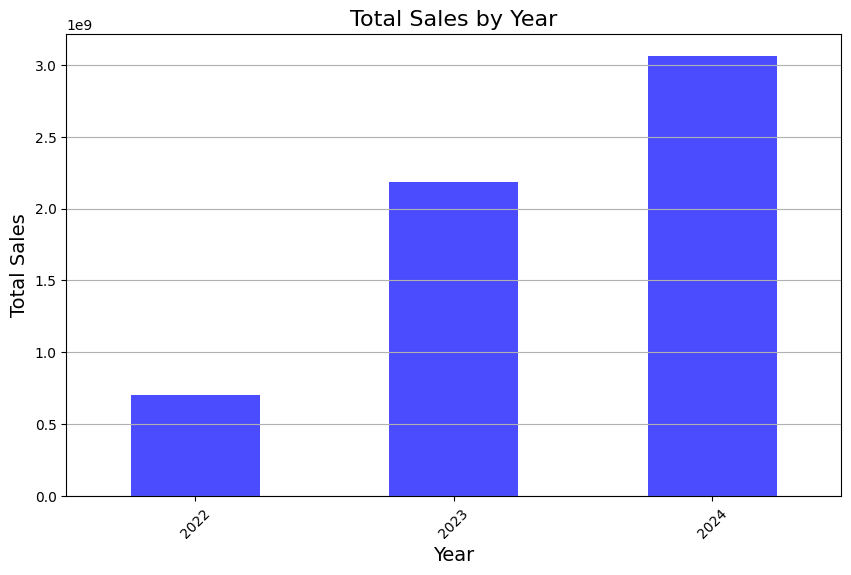

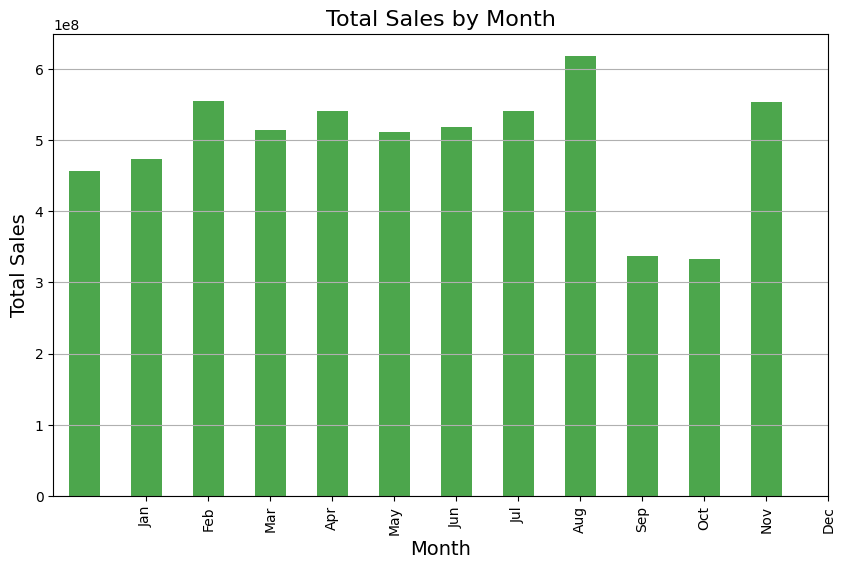

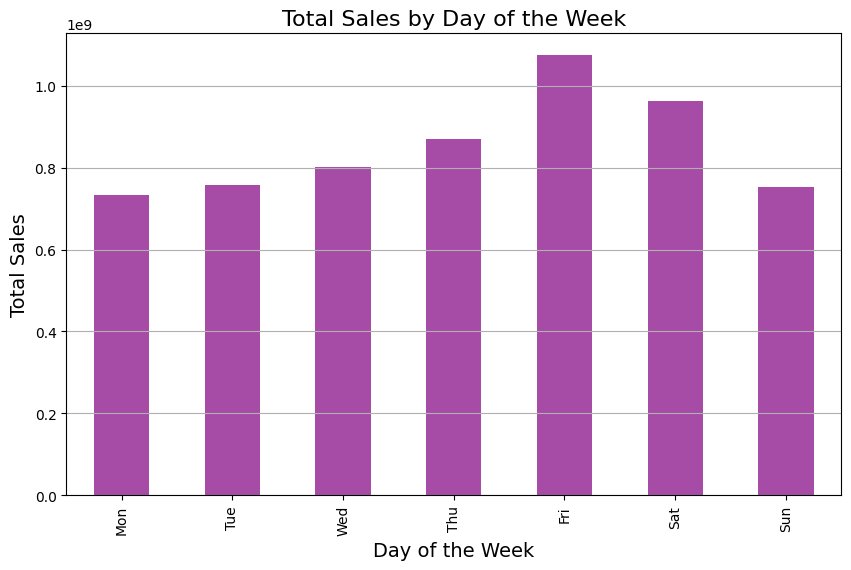

In [49]:
#To analyze seasonality and identify patterns in sales based on quantity and sum_total

#Group Data by Time Periods
# Group by Year
sales_by_year = df1.groupby('year')[['quantity', 'sum_total']].sum()

# Group by Month
sales_by_month = df1.groupby('month')[['quantity', 'sum_total']].sum()

# Group by Day of the Week
sales_by_day_of_week = df1.groupby('day_of_week')[['quantity', 'sum_total']].sum()


#Plot Time-Based Trends
#Sales by year
plt.figure(figsize=(10, 6))
sales_by_year['sum_total'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#Sales by month
plt.figure(figsize=(10, 6))
sales_by_month['sum_total'].plot(kind='bar', color='green', alpha=0.7)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

#Sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day_of_week['sum_total'].plot(kind='bar', color='purple', alpha=0.7)
plt.title('Total Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y')
plt.show()

In [50]:
#To identify the top-selling products in terms of quantity or sum_total grouped by item_id

#Group data by item_id
# Group by item_id and calculate total quantity and sum_total
top_products = df1.groupby('item_id')[['quantity', 'sum_total']].sum().reset_index()

#sort data to identify bestsellers
# Sort by quantity
top_products_by_quantity = top_products.sort_values(by='quantity', ascending=False)

# Sort by sum_total
top_products_by_revenue = top_products.sort_values(by='sum_total', ascending=False)



<Figure size 1000x600 with 0 Axes>

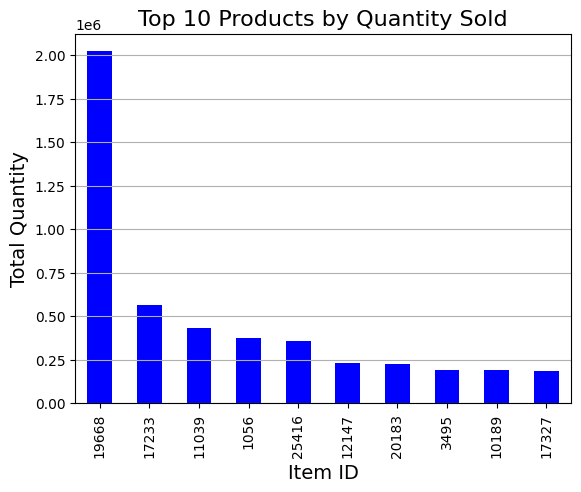

<Figure size 1000x600 with 0 Axes>

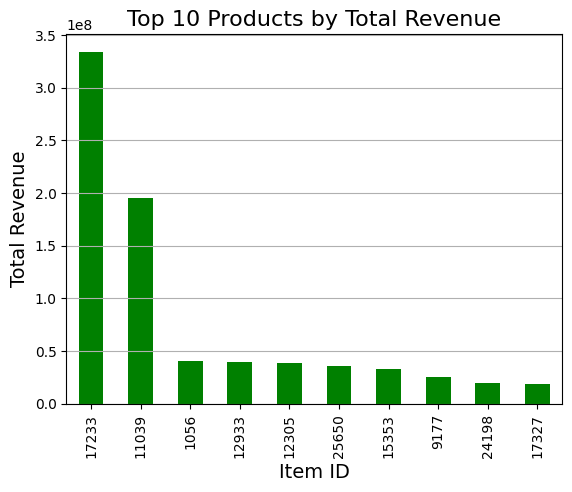

In [51]:
#Using barcharts to illustrate

#Top Products by Quantity:
plt.figure(figsize=(10, 6))
top_products_by_quantity.head(10).plot(
    x='item_id', y='quantity', kind='bar', color='blue', legend=False
)
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Item ID', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.grid(axis='y')
plt.show()

#Top Products by Revenue:
plt.figure(figsize=(10, 6))
top_products_by_revenue.head(10).plot(
    x='item_id', y='sum_total', kind='bar', color='green', legend=False
)
plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.xlabel('Item ID', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(axis='y')
plt.show()

## Modeling

In [52]:
#make a copy of dataframe before modelling
df2 = df1.copy(deep=True)
df2.head()

,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,item_type,weight_volume,weight_netto,division,city,area,year,month,day,day_of_week
0,4631,1.000,47.86,47.86,1,109,94,350,0.0155,0.015,0,0,1500,2023,8,4,4
1,18580,3.000,49.60,148.80,1,71,279,244,0.5000,0.500,0,0,1500,2023,8,4,4
2,24162,0.822,379.00,311.54,1,136,397,444,0.0000,0.000,0,0,1500,2023,8,4,4
3,18311,1.000,129.00,129.00,1,99,86,131,0.2000,0.200,0,0,1500,2023,8,4,4
4,19103,7.000,79.90,559.30,1,138,125,159,0.3500,0.350,0,0,1500,2023,8,4,4


In [53]:
#Standardize the features columns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#split df2 into X and y
y = df2['quantity']
X = df2.drop(columns=['quantity'], axis=1)

#split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retain feature names and convert back to DataFrame

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [55]:
#Model selection and training using Random Forest
#import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Initialize the Random Forest model
#model = RandomForestRegressor(n_estimators=50, random_state=42)

#Train the model
#model.fit(X_train, y_train)

#Make prediction on the test set
#y_pred = model.predict(X_test)

#Evaluate the model using Mean Absolute Error
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)

print(f'Root Mean Square Error: {rmse}')

KeyboardInterrupt: 

In [ ]:
#Hyperparameter tuning the Random Forest model
#model2 = RandomForsetRegressor(
    n_estimators=200
    max_depth=10,#Model selection and training using Random Forest
#import numpy as np

#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Initialize the Random Forest model
#model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
#model.fit(X_train, y_train)

#Make prediction on the test set
#y_pred = model.predict(X_test)

#Evaluate the model using Mean Absolute Error
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)

#print(f'Root Mean Square Error: {rmse}')
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

#model2.fit(X_train, y_train)
#y_pred = model2.predict(X_test)

#Evaluate the model using Mean Absolute Error
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)

#print(f'Root Mean Square Error: {rmse}')

In [56]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

# Define LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters (tune these later)
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

# Predict on test set
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"mse: {mae:.2f}, rmse: {rmse:.2f}")

mse: 0.61, rmse: 6.49


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

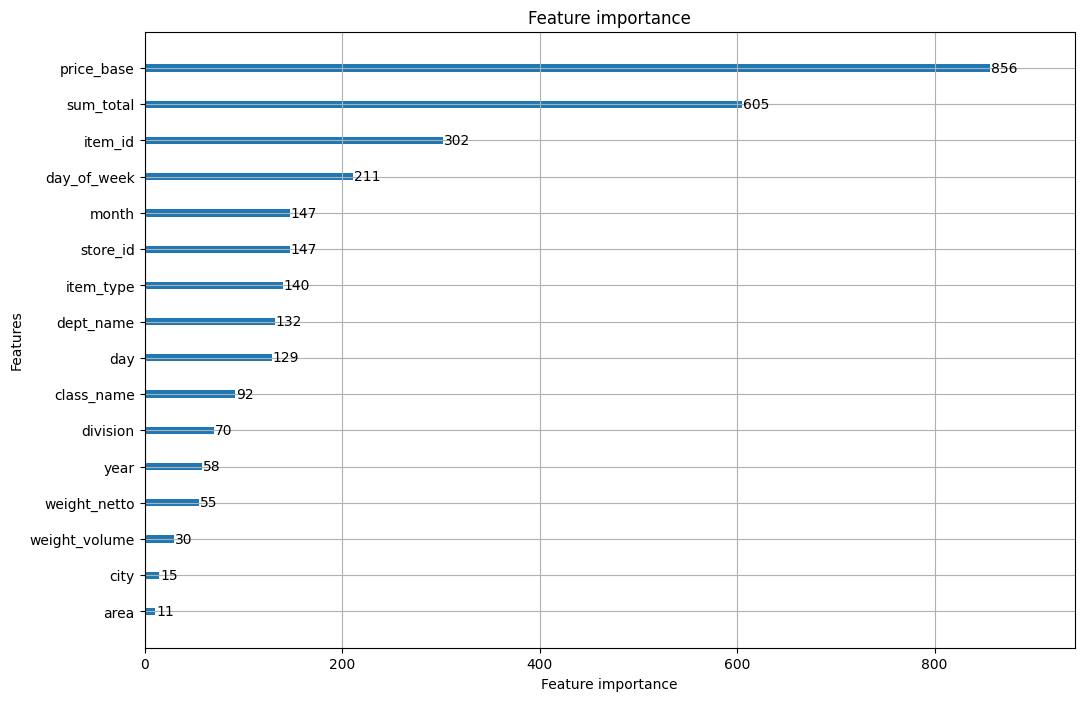

In [62]:
# Plot feature importance
lgb.plot_importance(model, figsize=(12, 8), max_num_features=20)

In [ ]:
# Add time-series features (e.g., lagged demand)
df['lag_7'] = df.groupby(['item_id', 'store_id'])['quantity'].shift(7)  # 7-day lag

# Hyperparameter tuning (example)
from sklearn.model_selection import GridSearchCV

# Wrap LightGBM in sklearn API
lgb_reg = lgb.LGBMRegressor()
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(lgb_reg, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}")